# The adult census dataset

In [1]:
import pandas as pd

adult_census = pd.read_csv('./datasets/adult-census.csv')

In [8]:
target_column = 'class'

adult_census[target_column].value_counts()

 <=50K    37155
 >50K     11687
Name: class, dtype: int64

In [9]:
numerical_columns = [
    "age",
    "education-num",
    "capital-gain",
    "capital-loss",
    "hours-per-week",
]
categorical_columns = [
    "workclass",
    "education",
    "marital-status",
    "occupation",
    "relationship",
    "race",
    "sex",
    "native-country",
]
all_columns = numerical_columns + categorical_columns + [target_column]

adult_census = adult_census[all_columns]

In [14]:
# the number of samples and te number of columns available in the dataset
print(
    adult_census.shape,
    f"The dataset contains {adult_census.shape[0]} samples and "
    f"{adult_census.shape[1]} columns"
)

(48842, 14) The dataset contains 48842 samples and 14 columns


In [17]:
print(
    f"Number of features is defined bum the number of columns minus 1, i.e.,\n"
    f"{adult_census.shape[1]} columns, so {adult_census.shape[1] -1} features"
)

Number of features is defined bum the number of columns minus 1, i.e.,
14 columns, so 13 features


## Visual inspection of the data

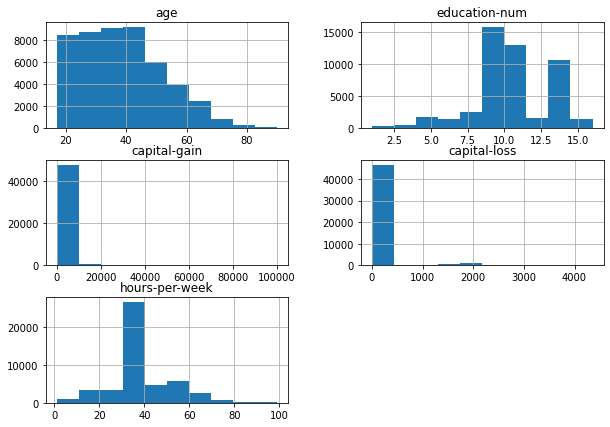

In [20]:
# Histogram for numerical features
_ = adult_census.hist(figsize=(10, 7))

In [21]:
# distribution of values for categorical features
adult_census['sex'].value_counts()

 Male      32650
 Female    16192
Name: sex, dtype: int64

In [22]:
adult_census['education'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8025
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [24]:
pd.crosstab(index=adult_census['education'], columns=adult_census['education-num'])

education-num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
education,,,,,,,,,,,,,,,,
10th,0,0,0,0,0,1389,0,0,0,0,0,0,0,0,0,0
11th,0,0,0,0,0,0,1812,0,0,0,0,0,0,0,0,0
12th,0,0,0,0,0,0,0,657,0,0,0,0,0,0,0,0
1st-4th,0,247,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5th-6th,0,0,509,0,0,0,0,0,0,0,0,0,0,0,0,0
7th-8th,0,0,0,955,0,0,0,0,0,0,0,0,0,0,0,0
9th,0,0,0,0,756,0,0,0,0,0,0,0,0,0,0,0
Assoc-acdm,0,0,0,0,0,0,0,0,0,0,0,1601,0,0,0,0
Assoc-voc,0,0,0,0,0,0,0,0,0,0,2061,0,0,0,0,0


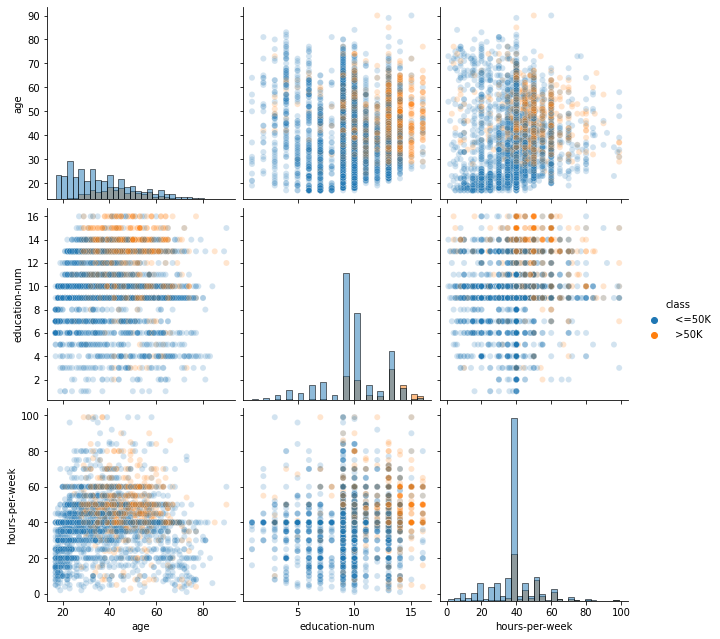

In [25]:
# parplot to show how each variable differs according to our target
import seaborn as sns

n_samples_to_plot = 5000
columns = ['age', 'education-num', 'hours-per-week']
_ = sns.pairplot(
    data=adult_census[:n_samples_to_plot],
    vars=columns,
    hue=target_column,
    plot_kws={'alpha':0.2},
    height=3,
    diag_kind='hist',
    diag_kws={'bins': 30}
)

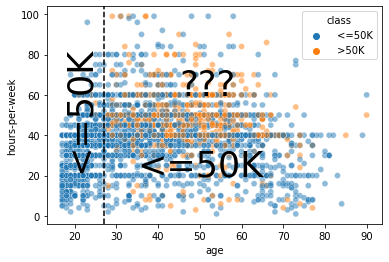

In [30]:
import matplotlib.pyplot as plt

_ = sns.scatterplot(
    x='age', y='hours-per-week',
    data=adult_census[:n_samples_to_plot],
    hue=target_column,
    alpha=0.5
)

age_limit = 27
plt.axvline(x=age_limit, ymin=0, ymax=1, color='black', linestyle='--')
plt.annotate("<=50K", (17, 25), rotation=90, fontsize=35)
plt.annotate("<=50K", (35, 20), fontsize=35)
_ = plt.annotate("???", (45, 60), fontsize=35)